In [48]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [49]:
df = pd.read_json("results/multivariate/mae.json")

In [50]:
datasets = df.columns.tolist()
contexts = df.index.tolist()
TARGET_LEN=24
new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [51]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()

In [52]:
merged_df

,national_illness,exchange_rate,etth2,etth1,ettm1,ettm2,weather
model,,,,,,,
itransformer,1.362611,0.132993,0.249490,0.392486,0.337911,0.189836,0.143995
moment,1.112890,0.152771,0.352863,0.405627,0.348891,0.293029,0.304201
patchtst,1.404431,0.125090,0.252184,0.440007,0.301304,0.168514,0.122615
samformer,1.497766,0.328025,0.310965,0.551504,0.511764,0.255016,0.309246
timemixer,0.994171,0.107093,0.243516,0.405003,0.337393,0.176168,0.144182
vaformer,0.923597,0.111970,0.239610,0.384722,0.323023,0.173027,0.130136


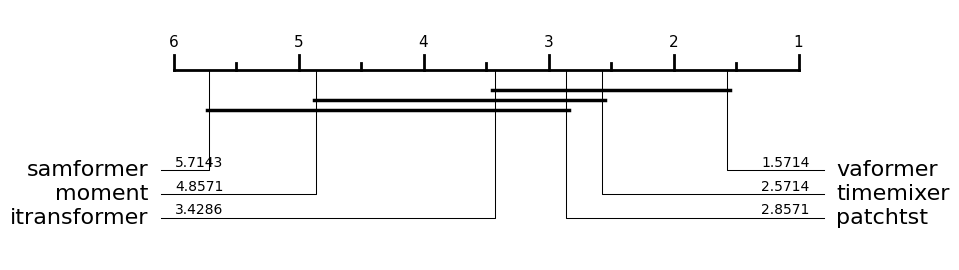

In [53]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  